Importar librerias

# Sección nueva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [3]:
datos = pd.read_csv('/content/sample_data/regresión.csv')

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [6]:
datos.describe(). T

,count,mean,std,min,25%,50%,75%,max
duracion,170.0,111.075729,202.453200,1.0,11.0,13.0,108.0,898.0
paginas,170.0,2.041176,1.500911,1.0,1.0,2.0,2.0,9.0
acciones,170.0,8.723529,9.136054,1.0,3.0,6.0,10.0,63.0
valor,170.0,32.676471,44.751993,1.0,8.0,20.0,36.0,378.0
clase,170.0,0.752941,0.841327,0.0,0.0,0.0,2.0,2.0


In [5]:
print(datos.isnull().sum)

<bound method DataFrame.sum of      duracion  paginas  acciones  valor  clase
0       False    False     False  False  False
1       False    False     False  False  False
2       False    False     False  False  False
3       False    False     False  False  False
4       False    False     False  False  False
..        ...      ...       ...    ...    ...
165     False    False     False  False  False
166     False    False     False  False  False
167     False    False     False  False  False
168     False    False     False  False  False
169     False    False     False  False  False

[170 rows x 5 columns]>


In [7]:
datos[datos.duplicated()]

,duracion,paginas,acciones,valor,clase
106,12.0,1,6,24,1
108,12.0,1,6,24,1
113,12.0,1,2,2,2
115,12.0,1,3,6,2
118,12.0,1,3,3,2
120,11.0,1,3,6,2
121,12.0,1,3,6,2
122,12.0,1,2,2,2
123,12.0,1,3,3,2
124,11.0,1,3,3,2


In [8]:
#borrar archivo duplicados

datos.drop_duplicates(inplace=True)
datos


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


# Sección nueva

**Importar bibliotecas**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Cargar el dataset

In [10]:
# Cargar el dataset
from google.colab import files
uploaded = files.upload()

# Leer el archivo CSV
data = pd.read_csv('regresión.csv')

# Mostrar las primeras filas del dataset
print(data.head())


Saving regresión.csv to regresión.csv
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2


Explorar y preparar los datos

In [21]:
# Información básica del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())

# Si hay valores nulos, eliminarlos o imputarlos
data = data.dropna()  # Eliminar valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB
None
         duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.00000

Análisis exploratorio de datos (EDA)

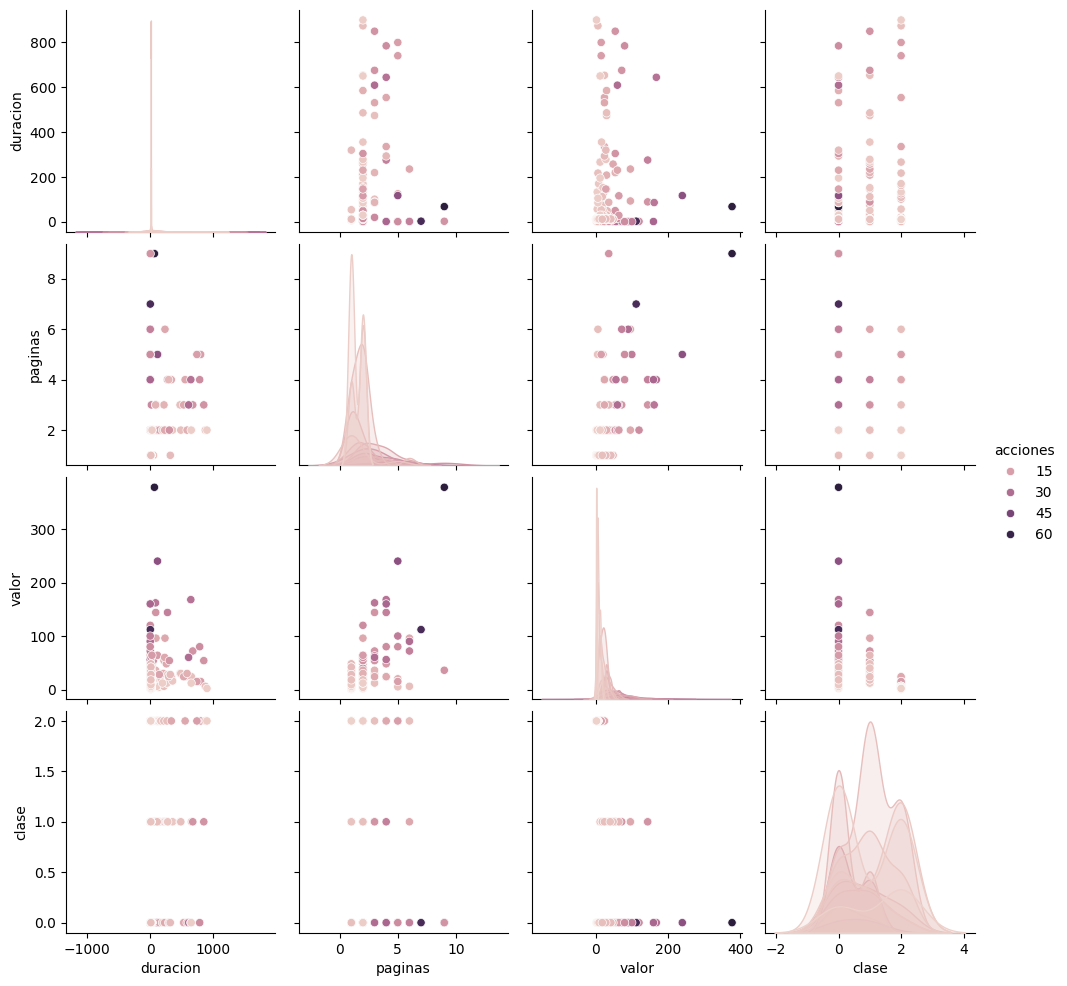

In [26]:
# Relación entre características y la variable objetivo
sns.pairplot(data, hue='acciones')  # Cambia 'target' por el nombre de tu variable objetivo
plt.show()


Dividir los datos en entrenamiento y prueba

In [27]:
# Definir características (X) y variable objetivo (y)
X = data.drop('acciones', axis=1)  # Cambia 'target' por el nombre de tu columna objetivo
y = data['acciones']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar el modelo de regresión logística

In [28]:
# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluar el modelo

In [29]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")


Matriz de confusión:
[[0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Visualización de resultados

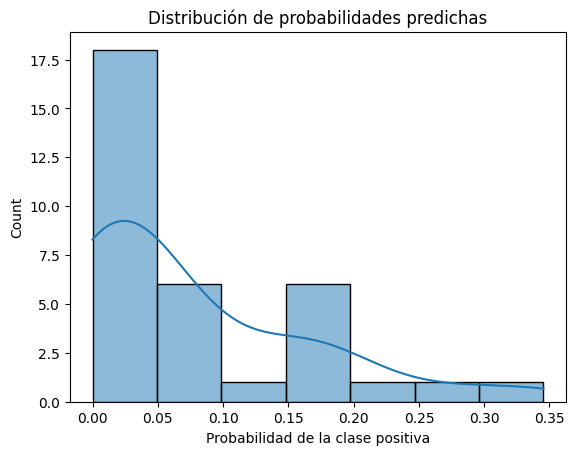

In [30]:
# Visualizar probabilidades predichas
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
sns.histplot(y_prob, kde=True)
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad de la clase positiva")
plt.show()
